In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

In [20]:
mydf = pd.read_csv("TESS_rotation_southern_CVZ.csv")

In [21]:
mydf.head()

,Unnamed: 0,ticid,LS_correct,ACF_correct,PDM_correct,obvious_signal,ls_period,acf_period,pdm_period,period_err,...,ls_peak1,ls_peak2,ls_peak3,acf_peak1,acf_peak2,acf_peak3,pdm_peak1,pdm_peak2,pdm_peak3,stitch_success
0,0,149107360,0.0,0,0.0,0.0,3.804173,99.023690,11.39000,1.134913,...,0.000926,0.000853,0.000795,0.026789,0.026788,0.026786,-0.998650,-0.999117,-0.999154,1
1,1,149175965,0.0,0,0.0,1.0,28.710594,1.509723,4.25025,0.414535,...,0.000318,0.000315,0.000304,0.049169,0.046357,0.043487,-0.997939,-0.999095,-0.999124,1
2,2,149218072,1.0,1,1.0,1.0,5.255366,5.281949,5.27000,-0.033534,...,0.121099,0.034478,0.033851,0.277684,0.232132,0.163292,-0.888406,-0.895726,-0.965233,1
3,3,149252615,0.0,0,1.0,1.0,1.598746,51.915319,3.20000,0.310186,...,0.035759,0.030160,0.029301,0.045288,0.042845,0.041653,-0.971636,-0.972361,-0.976384,1
4,4,149253154,0.0,0,0.0,0.0,0.525765,2.136113,1.19000,0.108373,...,0.000908,0.000866,0.000862,0.020643,0.012254,0.012191,-0.999703,-0.999721,-0.999772,1


In [18]:
from astropy.table import Table
tic_table = Table.read('tic_table.fits')
tic_table = tic_table.to_pandas()

ticid = np.zeros(len(tic_table), dtype="int")
for i in range(len(tic_table)):
    ticid[i] = int(tic_table.ID.values[i])

tic_table["ticid"] = ticid

In [23]:
df = pd.merge(tic_table, mydf, on="ticid", how="right", suffixes=["", "my_df"])

print(np.shape(tic_table), np.shape(mydf), np.shape(df))

(29622, 126) (86, 21) (86, 146)


In [25]:
for k in df.keys():
    print(k)

ID
version
HIP
TYC
UCAC
TWOMASS
SDSS
ALLWISE
GAIA
APASS
KIC
objType
typeSrc
ra
dec
POSflag
pmRA
e_pmRA
pmDEC
e_pmDEC
PMflag
plx
e_plx
PARflag
gallong
gallat
eclong
eclat
Bmag
e_Bmag
Vmag
e_Vmag
umag
e_umag
gmag
e_gmag
rmag
e_rmag
imag
e_imag
zmag
e_zmag
Jmag
e_Jmag
Hmag
e_Hmag
Kmag
e_Kmag
TWOMflag
prox
w1mag
e_w1mag
w2mag
e_w2mag
w3mag
e_w3mag
w4mag
e_w4mag
GAIAmag
e_GAIAmag
Tmag
e_Tmag
TESSflag
SPFlag
Teff
e_Teff
logg
e_logg
MH
e_MH
rad
e_rad
mass
e_mass
rho
e_rho
lumclass
lum
e_lum
d
e_d
ebv
e_ebv
numcont
contratio
disposition
duplicate_id
priority
eneg_EBV
epos_EBV
EBVflag
eneg_Mass
epos_Mass
eneg_Rad
epos_Rad
eneg_rho
epos_rho
eneg_logg
epos_logg
eneg_lum
epos_lum
eneg_dist
epos_dist
distflag
eneg_Teff
epos_Teff
TeffFlag
gaiabp
e_gaiabp
gaiarp
e_gaiarp
gaiaqflag
starchareFlag
VmagFlag
BmagFlag
splists
e_RA
e_Dec
RA_orig
Dec_orig
e_RA_orig
e_Dec_orig
raddflag
wdflag
objID
ticid
Unnamed: 0
LS_correct
ACF_correct
PDM_correct
obvious_signal
ls_period
acf_period
pdm_period
period_err
Rv

(2800, 9000)

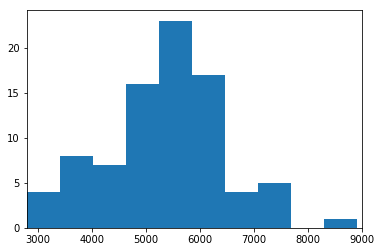

In [27]:
plt.hist(df.Teff);
plt.xlim(2800, 9000)

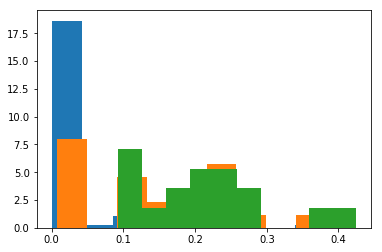

In [34]:
plt.hist(df.ls_peak1, density=True);
plt.hist(df.ls_peak1.values[df.LS_correct.values==1], density=True);
plt.hist(df.ls_peak1.values[df.ls_peak1.values > .05], density=True);

In [36]:
big_df = pd.read_csv("results_31_12_19.csv")
print(np.shape(big_df))

df = pd.merge(tic_table, big_df, on="ticid", how="right", suffixes=["", "my_df"])
print(np.shape(df))

(599, 17)
(599, 142)


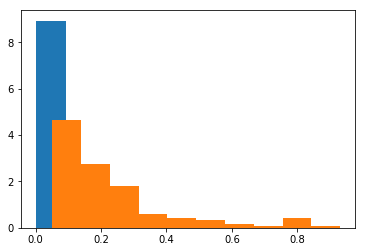

In [37]:
plt.hist(df.ls_peak1, density=True);
plt.hist(df.ls_peak1.values[df.ls_peak1.values > .05], density=True);

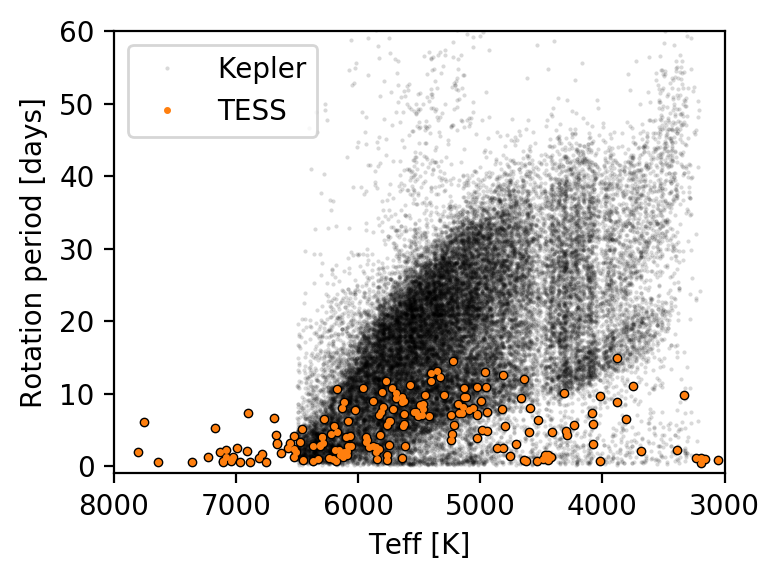

In [94]:
mc = pd.read_csv("Table_1_Periodic.txt")

plt.figure(figsize=(4, 3), dpi=200)
plt.plot(mc.Teff, mc.Prot, "k.", alpha=.15, ms=3, mec="none", zorder=0, label="Kepler")
m = (df.ls_peak1.values > .01) * (df.ls_period.values < 15)
plt.plot(df.Teff[m], df.ls_period.values[m], "C1o", ms=1.5, zorder=2, label="TESS")
plt.plot(df.Teff[m], df.ls_period.values[m], "ko", ms=2.5, zorder=1)
plt.xlim(8000, 3000)
plt.ylim(-1, 60)
plt.xlabel("Teff [K]")
plt.ylabel("Rotation period [days]")
plt.legend()
plt.tight_layout()
plt.savefig("TESS_CVZ_period_plot")
plt.savefig("TESS_CVZ_period_plot.pdf")

In [96]:
_all = len(mc.Prot.values[mc.Teff.values < 4000])
short = len(mc.Prot.values[(mc.Prot.values < 15)*(mc.Teff.values < 4000)])
print(_all, short, short/_all)

2436 394 0.16174055829228243


In [56]:
print(df.ticid.values[m][df.ls_period.values[m] > 15])

[220477676 350342912 350334038 350518984 260372062 348839628 278729421
 279088392 293972244]


In [59]:
print(df.ticid.values[m][df.ls_period.values[m] > 15])

[220395015 220477676 350297825 350342912 350334038 350518984 260165092
 260188534 260372062 348839628 348839788 260605873 278729421 278825448
 279157429 279088392 279088395 293971351 293972244]


In [61]:
print(df.ticid.values[m][(df.ls_period.values[m] > 10) * (df.ls_period.values[m] < 15)])

[220422151 220478522 350298298 350478801 350336553 350342756 350432444
 260267665 260297096 260542381 150430616 260415151 278684936 260636889
 278728169 278776865 278824412 348839459 278683844 278988053 294208238
 294092998]


In [73]:
print(len(df.Teff[m])/900.)

0.22
